In [4]:

# Importing the libraries
import numpy as np
import pandas as pd
import imageio
import os
import matplotlib.pyplot as plt
from pylab import *

In [2]:

train_data = pd.read_csv(r"H:\GIT project\Machine Learning with Abolgasemi\5\Q5_Datasets\part2\Fashion-MNIST\trainData.csv",header=None)
train_label = pd.read_csv(r"H:\GIT project\Machine Learning with Abolgasemi\5\Q5_Datasets\part2\Fashion-MNIST\trainLabels.csv",header=None)
test_data = pd.read_csv(r"H:\GIT project\Machine Learning with Abolgasemi\5\Q5_Datasets\part2\Fashion-MNIST\testData.csv",header=None)
test_label = pd.read_csv(r"H:\GIT project\Machine Learning with Abolgasemi\5\Q5_Datasets\part2\Fashion-MNIST\testLabels.csv",header=None)

pd.set_option('display.max_columns', None)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,193,228,218,213,198,180,212,210,211,213,223,220,243,202,0,0,0,0,0,0,0,0,0,0,1,3,0,12,219,220,212,218,192,169,227,208,218,224,212,226,197,209,52,0,0,0,0,0,0,0,0,0,0,6,0,99,244,222,220,218,203,198,221,215,213,222,220,245,119,167,56,0,0,0,0,0,0,0,0,0,4,0,0,5

In [7]:
#find unique label
unique_label = train_label.iloc[:,0].unique()

within_group_scatter = array(0)

for i in unique_label :
    select_index = train_label.loc[train_label.iloc[:,0]==i].index
    matrix = array(0)
    for j in select_index :
        sample = array(train_data.iloc[j].values.tolist())
        matrix = matrix + sample*sample.reshape(-1,1)
    within_group_scatter = within_group_scatter + matrix

print("within cluster matrix:  " )
print(within_group_scatter)

within cluster matrix:  
[[     514      448      448 ...      439      372      379]
 [     448     3723     6467 ...    10278     4314      664]
 [     448     6467    35431 ...    46530    13256     2456]
 ...
 [     439    10278    46530 ... 18310882  6260804   530248]
 [     372     4314    13256 ...  6260804  5045140   573847]
 [     379      664     2456 ...   530248   573847   258841]]


0


In [27]:

sum_data = np.zeros_like(train_data.iloc[0])
for i in range(len(train_data)):
    data = np.array(train_data.iloc[i])
    sum_data = np.add(sum_data, data)
data_mean = sum_data / len(train_data)

unique_labels = train_label.iloc[:, 0].unique()

between_group_scatter = np.zeros_like(train_data.iloc[0])
for j in unique_labels:
    sum_label = np.zeros_like(train_data.iloc[0])
    matrix = np.zeros((len(train_data.iloc[0]), len(train_data.iloc[0])))
    index_select = train_label.loc[train_label.iloc[:, 0] == j].index
    for i in index_select:
        sample = np.array(train_data.iloc[i])
        sum_label = np.add(sum_label, sample)
    label_mean = sum_label / len(index_select)
    mean_diff = np.subtract(data_mean, label_mean)
    matrix = matrix + np.outer(mean_diff, mean_diff)
    between_group_scatter = between_group_scatter + matrix
print("between cluster matrix:")
print(between_group_scatter)

between cluster matrix:
[[ 1.29888889e-05  2.22888889e-05  2.02861111e-04 ... -9.18427778e-03
  -3.35802778e-03 -1.51066667e-04]
 [ 2.22888889e-05  3.37947222e-04  2.31965278e-03 ...  1.08641944e-02
   6.06411111e-03  1.30763611e-03]
 [ 2.02861111e-04  2.31965278e-03  1.98100139e-02 ... -1.20862250e-01
  -8.42765556e-02 -3.69195833e-03]
 ...
 [-9.18427778e-03  1.08641944e-02 -1.20862250e-01 ...  5.93001829e+01
   1.61146536e+01  1.30130458e+00]
 [-3.35802778e-03  6.06411111e-03 -8.42765556e-02 ...  1.61146536e+01
   6.90668900e+00  5.64335194e-01]
 [-1.51066667e-04  1.30763611e-03 -3.69195833e-03 ...  1.30130458e+00
   5.64335194e-01  5.72470583e-02]]


In [28]:
within_inv = np.linalg.inv(within_group_scatter)
Seperabile_matrix =  np.matmul(within_inv,between_group_scatter)

print("Seperability matrix:\n",Seperabile_matrix)

Seperability matrix:
 [[ 2.13934914e-08 -1.02190875e-08 -3.13146643e-08 ... -8.05114621e-06
  -2.39457391e-06 -8.20089262e-08]
 [-5.75212111e-09  1.88008271e-08  4.35162725e-08 ... -3.93126223e-06
   7.27613772e-07  1.76273832e-07]
 [ 2.40659769e-09  5.04017094e-09  1.08547239e-07 ... -3.05113466e-07
  -1.10193495e-06 -1.80593923e-07]
 ...
 [ 1.63087843e-10 -4.05208988e-10 -1.87719999e-09 ...  1.51242469e-07
  -3.13233567e-09 -2.58033051e-09]
 [-1.13436496e-10 -1.44236991e-09 -6.63855026e-09 ... -6.23108281e-08
  -2.46009182e-08 -1.36722401e-08]
 [ 1.03122389e-10  1.37615825e-09  6.48750320e-09 ...  5.61157138e-07
   1.56562554e-07  1.53267886e-08]]


Text(0, 0.5, 'eignevalues')

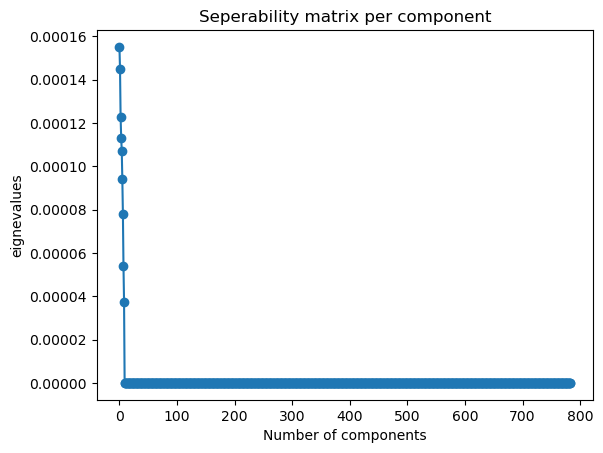

In [29]:
eigen_vals , eigen_vecs = np.linalg.eig(Seperabile_matrix)
eigen_vals = np.flip(np.sort(eigen_vals.real,axis=0))
plt.plot(range(len(eigen_vals)), eigen_vals, marker='o')
plt.title("Seperability matrix per component")
plt.xlabel("Number of components")
plt.ylabel("eignevalues")

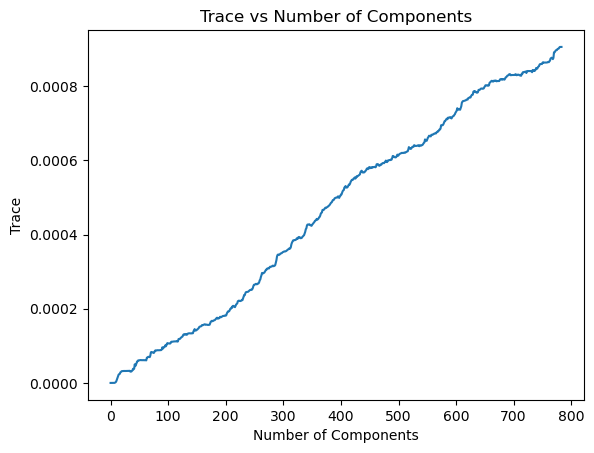

In [32]:

trace = np.trace(Seperabile_matrix)
sum_values = 0
x_values = []
y_values = []

for i in range(len(Seperabile_matrix)):
    sum_values += Seperabile_matrix[i][i]
    x_values.append(i)
    y_values.append(sum_values)

plt.plot(x_values, y_values, linestyle='-')
plt.xlabel("Number of Components")
plt.ylabel("Trace")
plt.title("Trace vs Number of Components")
plt.show()